In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from stepwise_regression import step_reg
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor

In [2]:
df_bp = pd.read_excel('C:/X_bp.xlsx')
df_nup = pd.read_excel('C:/X_nup.xlsx')

In [3]:
df = pd.merge(df_bp, df_nup, how='inner', on='Unnamed: 0')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.index.rename('index', inplace=True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
index,,,,,,,,,,,,,
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [5]:
df.describe(include='all').round(1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0
mean,2.9,1975.7,739.9,110.6,22.2,285.9,482.7,73.3,2466.9,218.4,44.3,6.9,57.2
std,0.9,73.7,330.2,28.3,2.4,40.9,281.3,3.1,485.6,59.7,45.0,2.6,12.4
min,0.4,1731.8,2.4,17.7,14.3,100.0,0.6,64.1,1036.9,33.8,0.0,0.0,0.0
25%,2.3,1924.2,500.0,92.4,20.6,259.1,266.8,71.2,2135.9,179.6,0.0,5.1,49.8
50%,2.9,1977.6,739.7,110.6,22.2,285.9,451.9,73.3,2459.5,219.2,0.0,6.9,57.3
75%,3.6,2021.4,961.8,129.7,24.0,313.0,693.2,75.4,2767.2,257.5,90.0,8.6,64.9
max,5.6,2207.8,1911.5,199.0,33.0,413.3,1399.5,82.7,3848.4,414.6,90.0,14.4,104.0


### Рассматривается соотношение "матрица - наполнитель"

1 Переименование целевой переменной

In [6]:
df['y_3'] = df['Соотношение матрица-наполнитель']
df = df.drop(columns=['Соотношение матрица-наполнитель'])

In [7]:
# Кодирование угла нашивки
# df.loc[df["Угол нашивки, град"] == 90, "Угол нашивки, град"] = 1

2 Удаление выбросов

In [8]:
clfout = IsolationForest(n_estimators=200, max_samples = 'auto', random_state = 1)    # contamination=float(0.1), 
clfout.fit(df)
df['anomaly'] = clfout.predict(df)
df = df[df.anomaly == 1]
df = df.drop(columns = 'anomaly')

# cols = df.columns
# for col in cols:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

print(df.shape)

(928, 13)


3 EDA

3.1 Визуализация данных

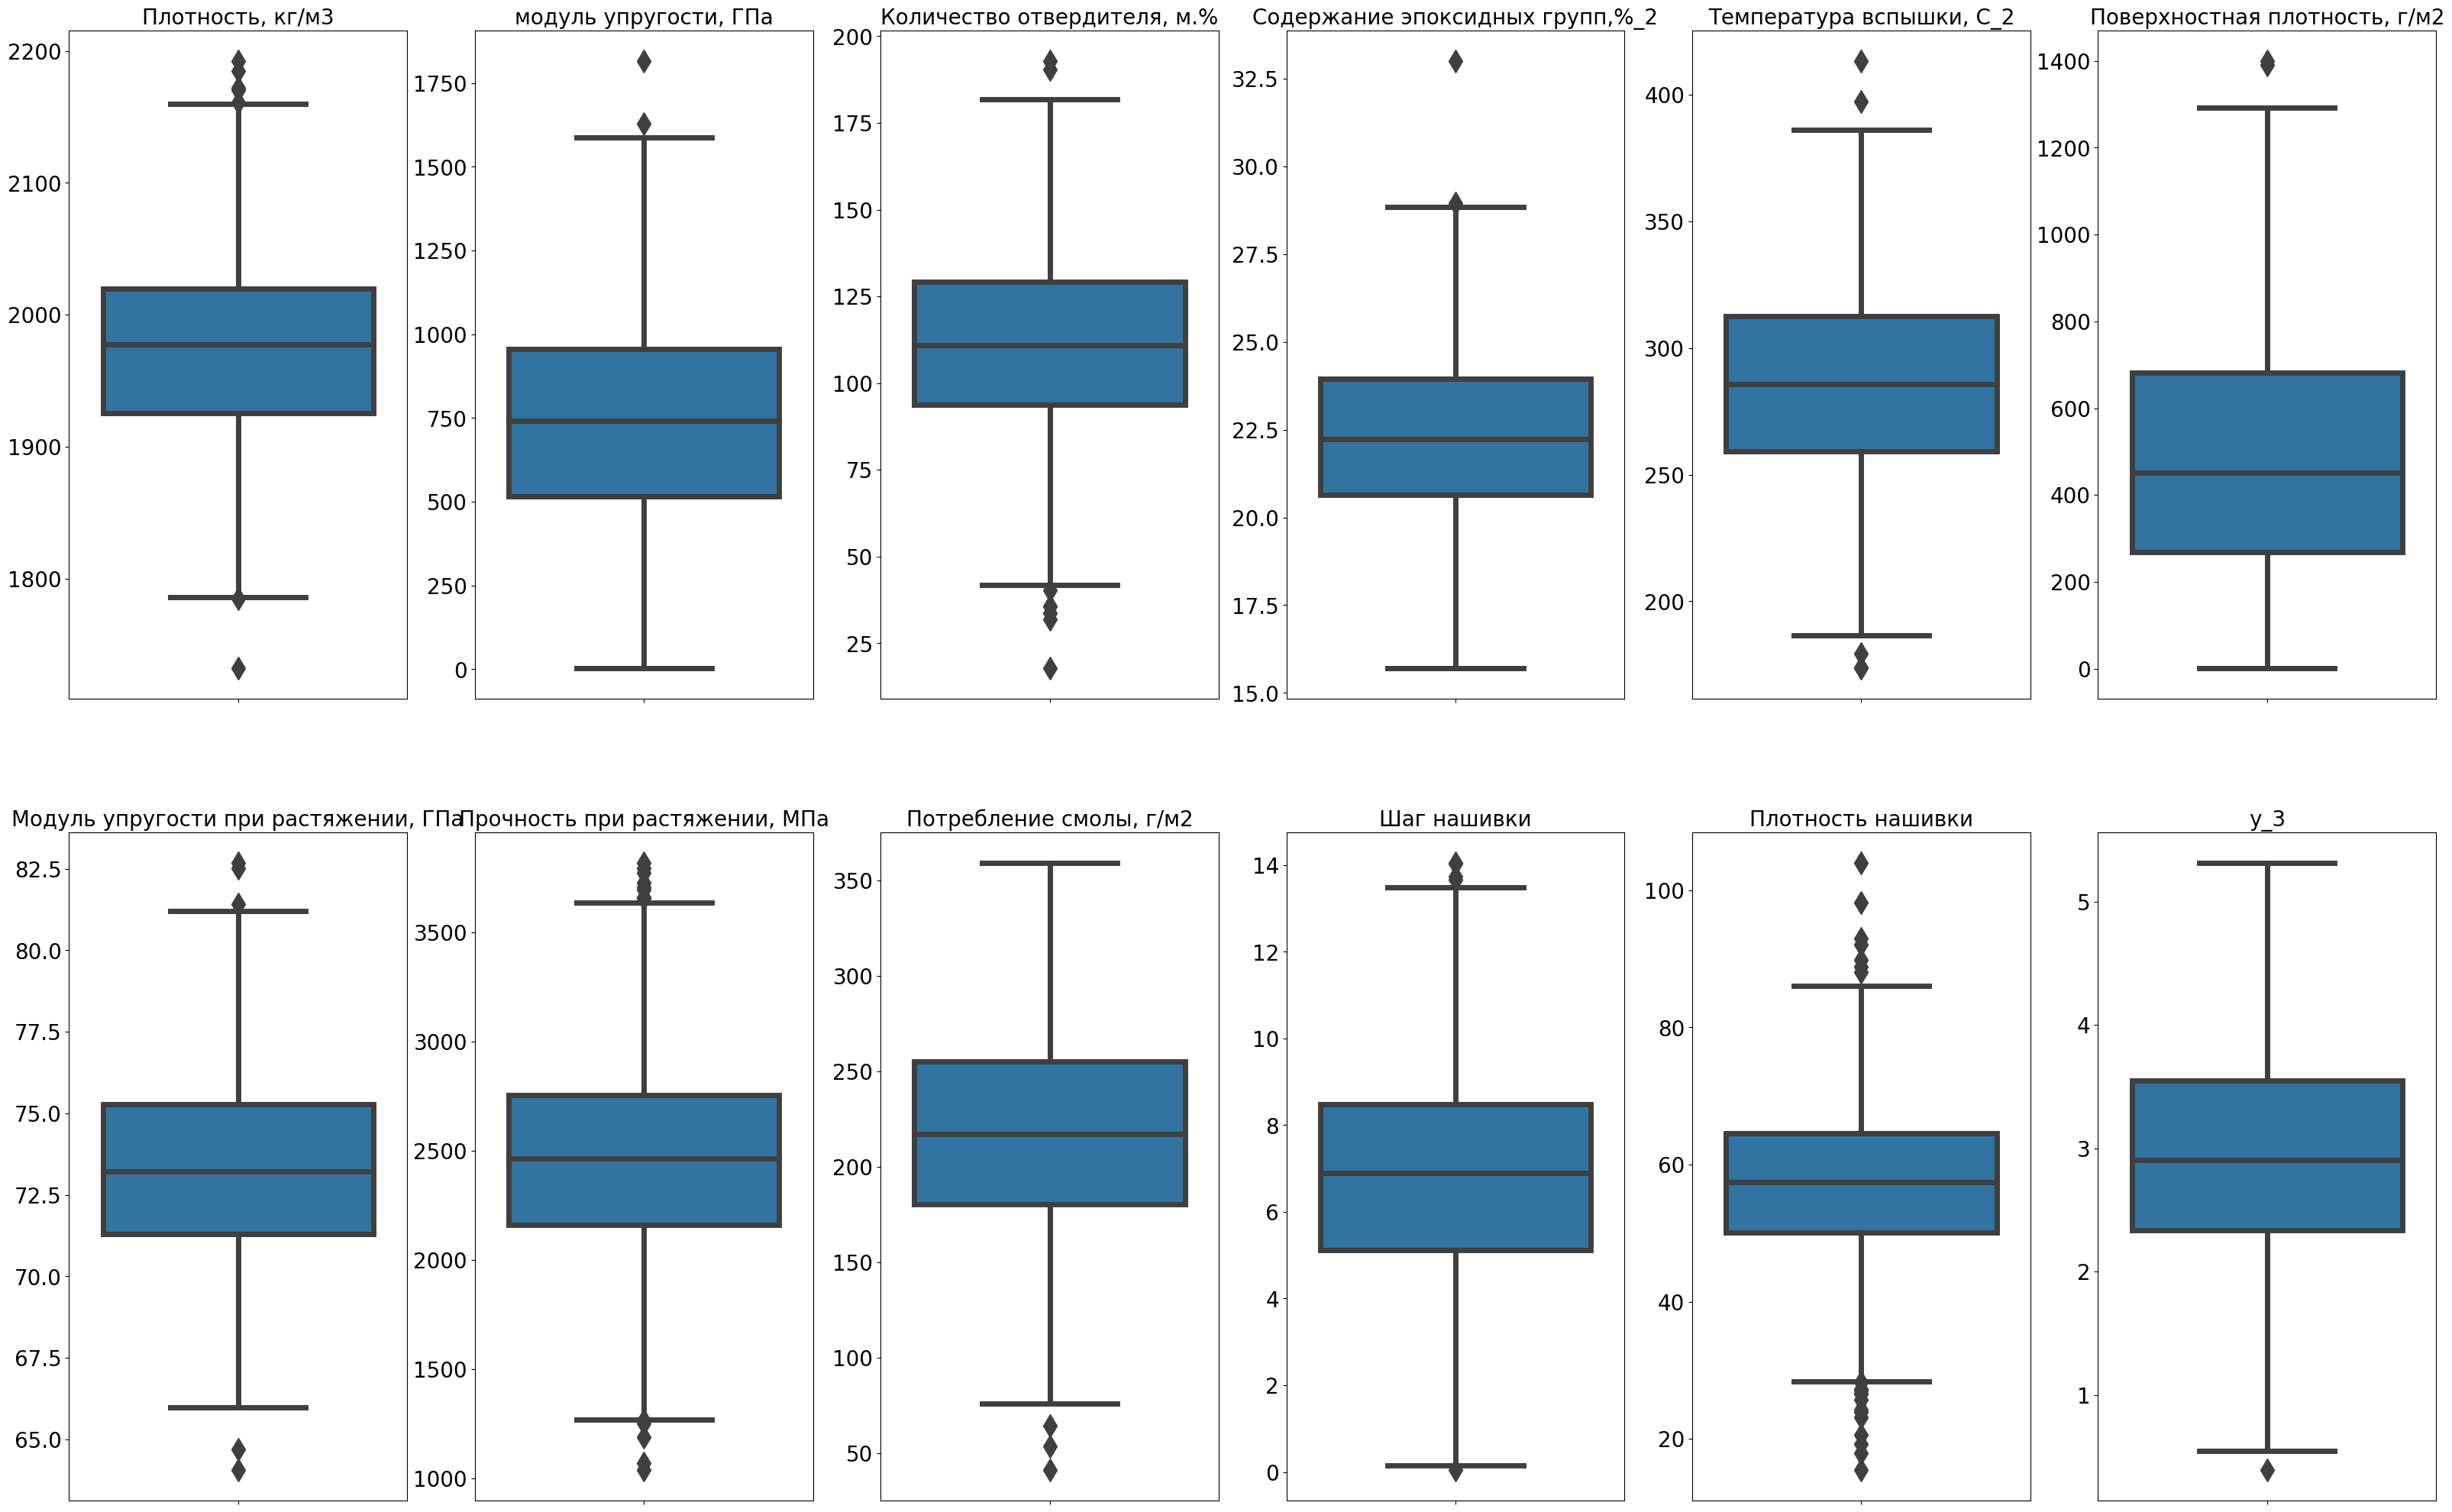

In [9]:
plt.figure(figsize=(40, 25))

for i, col in enumerate(df.drop('Угол нашивки, град', axis=1), start=1):
    plt.subplot(2, 6, i)
    sns.boxplot(data=df, y=col, fliersize=15, linewidth=5)
    # plt.setp(plt.gca().get_xticklabels(), fontsize=8)
    plt.setp(plt.gca().get_yticklabels(), fontsize=20)
    plt.title(col, size=20)
    plt.ylabel(None)

In [10]:
# sns.pairplot(df, kind="reg")    # hue = 'Угол нашивки, град',
# plt.show()

3.2 Приведение к нормальному распределению (методом Йео-Джонсона)

In [11]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
columns_to_transform = df.columns.difference(['y_3', 'Угол нашивки, град'])
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

In [12]:
# sns.pairplot(df, kind="reg")    # hue = 'Угол нашивки, град',
# plt.show()

4 Отбор признаков

In [13]:
x_0 = 'Соотношение матрица-наполнитель'
x_1 = 'Плотность, кг/м3'
x_2 = 'модуль упругости, ГПа'
x_3 = 'Количество отвердителя, м.%'
x_4 = 'Содержание эпоксидных групп,%_2'
x_5 = 'Температура вспышки, С_2'
x_6 = 'Поверхностная плотность, г/м2'
x_7 = 'Модуль упругости при растяжении, ГПа'
x_8 = 'Прочность при растяжении, МПа'
x_9 = 'Потребление смолы, г/м2'
x_10 = 'Угол нашивки, град'
x_11 = 'Шаг нашивки'
x_12 = 'Плотность нашивки'

    Рассматривается 'Угол нашивки' = 0 и 90

In [14]:
# df = df[df['Угол нашивки, град'] == 0]
# df = df.drop(columns=['Угол нашивки, град'])

4.1 Корреляционные матрицы

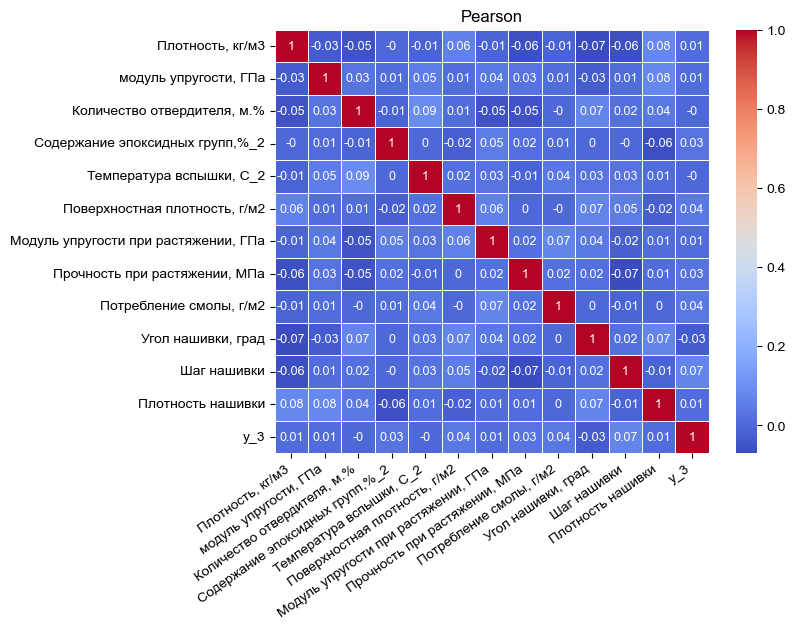

In [15]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

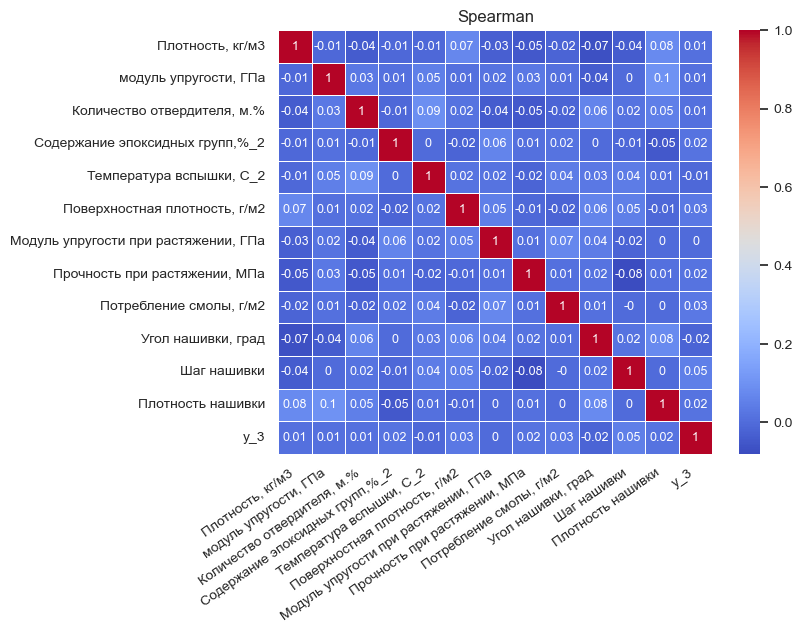

In [16]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='spearman').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Spearman')
plt.show()

4.2 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [17]:
corr_matrix_p = df.corr(method='pearson')
corr_matrix_s = df.corr(method='spearman')
# коэффициенты корреляции между y и x
corr_yx_p = corr_matrix_p['y_3'][:-1]
corr_yx_s = corr_matrix_s['y_3'][:-1]
# коэффициенты парной корреляции между x
corr_x_p = np.delete(np.array(corr_matrix_p), -1, axis=0)[:, :-1]
corr_x_s = np.delete(np.array(corr_matrix_s), -1, axis=0)[:, :-1]

det_r_yx_p = np.linalg.det(corr_matrix_p)
det_r_x_p = np.linalg.det(corr_matrix_p.iloc[:-1, :-1])
R2_P = 1 - det_r_yx_p / det_r_x_p

det_r_yx_s = np.linalg.det(corr_matrix_s)
det_r_x_s = np.linalg.det(corr_matrix_s.iloc[:-1, :-1])
R2_S = 1 - det_r_yx_s / det_r_x_s
print()
print(f"Прогноз коэф. детерминации R2 Pearson:  {R2_P.round(3)}")
print(f"Прогноз коэф. детерминации R2 Spearman: {R2_S.round(3)}")


Прогноз коэф. детерминации R2 Pearson:  0.012
Прогноз коэф. детерминации R2 Spearman: 0.007


In [18]:
X_3 = df.copy()
y_3 = X_3.pop('y_3')

4.3 Анализ значимости признаков

MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [19]:
mi_full = mutual_info_regression(X_3, y_3, random_state=2023)
f_full = f_regression(X_3, y_3)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X_3.corrwith(y_3), 'f':f_full[0], 'p':f_full[1]}, index=X_3.columns)
f_p_full.round(3)

,MI,corr,f,p
"Плотность, кг/м3",0.067,0.014,0.184,0.668
"модуль упругости, ГПа",0.025,0.012,0.142,0.706
"Количество отвердителя, м.%",0.000,-0.002,0.003,0.954
"Содержание эпоксидных групп,%_2",0.032,0.033,1.008,0.316
"Температура вспышки, С_2",0.000,-0.003,0.011,0.917
"Поверхностная плотность, г/м2",0.038,0.037,1.292,0.256
"Модуль упругости при растяжении, ГПа",0.000,0.007,0.049,0.825
"Прочность при растяжении, МПа",0.066,0.033,1.038,0.308
"Потребление смолы, г/м2",0.033,0.045,1.841,0.175
"Угол нашивки, град",0.030,-0.027,0.685,0.408


4.4 Анализ мультиколлинеарности признаков

In [20]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df, features = df.columns)

,VIF,Tolerance
"Плотность, кг/м3",1.028303,0.972476
"модуль упругости, ГПа",1.014752,0.985462
"Количество отвердителя, м.%",1.022233,0.978250
"Содержание эпоксидных групп,%_2",1.008560,0.991513
"Температура вспышки, С_2",1.012978,0.987188
"Поверхностная плотность, г/м2",1.018604,0.981735
"Модуль упругости при растяжении, ГПа",1.020094,0.980302
"Прочность при растяжении, МПа",1.014743,0.985471
"Потребление смолы, г/м2",1.009455,0.990634
"Угол нашивки, град",1.025223,0.975398


4.5 Пошаговый отбор признаков (stepwise regression)

In [21]:
backselect = step_reg.backward_regression(X_3, y_3, 0.05, verbose=False)
forwardselect = step_reg.forward_regression(X_3, y_3, 0.05, verbose=False)
print(backselect)
print(forwardselect)

['Шаг нашивки']
['Шаг нашивки']


#### В результате пошагового отбора рассматриваем следующие признаки:

In [22]:
df = df.loc[:, [x_4, x_6, x_8, x_9, x_11, 'y_3']]

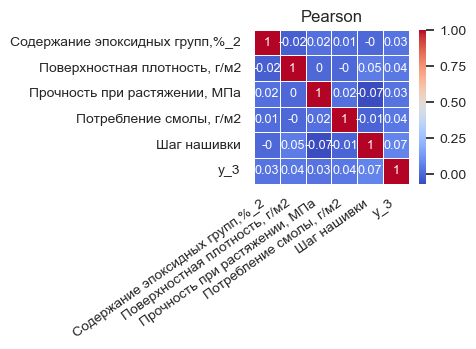

In [23]:
plt.figure(figsize=(2.5, 2))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

5 Разделение датасета на train и test, масштабирование

In [24]:
X_3 = df.drop(['y_3'], axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_3, # X_poly - если использовать полиномиальную регрессию
                                                    y_3,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(649, 5)
(279, 5)


In [26]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
# X_train_std = X_train
# X_test_std = X_test

6 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [27]:
df_train = pd.DataFrame(data=X_train_std, columns=X_3.columns)
df_train['y_3'] = y_train.reset_index(drop=True)
df_test = pd.DataFrame(data=X_test_std, columns=X_3.columns)
df_test['y_3'] = y_test.reset_index(drop=True)

corr_matrix_train = df_train.corr(method='pearson')
corr_matrix_test = df_test.corr(method='pearson')

corr_yx_train = corr_matrix_train['y_3'][:-1]    # коэффициенты корреляции между y и x
corr_yx_test = corr_matrix_test['y_3'][:-1]    # коэффициенты корреляции между y и x

corr_x_train = np.delete(np.array(corr_matrix_train), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x
corr_x_test = np.delete(np.array(corr_matrix_test), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x

det_r_yx_train = np.linalg.det(corr_matrix_train)
det_r_x_train = np.linalg.det(corr_matrix_train.iloc[:-1, :-1])
R2_train = 1 - det_r_yx_train / det_r_x_train
det_r_yx_test = np.linalg.det(corr_matrix_test)
det_r_x_test = np.linalg.det(corr_matrix_test.iloc[:-1, :-1])
R2_test = 1 - det_r_yx_test / det_r_x_test
print(f"Оценка R2 для full-выборки:  {R2_P.round(3)}")
print(f"Оценка R2 для train-выборки: {R2_train.round(3)}")
print(f"Оценка R2 для test-выборки:  {R2_test.round(3)}")

Оценка R2 для full-выборки:  0.012
Оценка R2 для train-выборки: 0.015
Оценка R2 для test-выборки:  0.013


In [28]:
# фиксация генератора случайных чисел
seed_value = 2023
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# функция для создания модели
def create_model(neurons_layer1, neurons_layer2):
    model = Sequential()
    model.add(Dense(neurons_layer1, input_dim=X_train_std.shape[1], activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mae', optimizer='adam', metrics=['mae'])
    return model

param_grid = {
    'neurons_layer1': [4, 8, 12, 16, 20, 24],
    'neurons_layer2': [4, 8, 12, 16, 20, 24],
}

# Создание объекта ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Оптимизация числа нейронов на каждом слое по условию минимума метрики mae
model = KerasRegressor(build_fn=create_model, epochs=100, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train_std, y_train, validation_data=(X_test_std, y_test), callbacks=[early_stopping])

# Обучение лучшей модели на всем тренировочном наборе
best_model = grid.best_estimator_.model
history = best_model.fit(X_train_std, y_train, epochs=100, validation_data=(X_test_std, y_test), callbacks=[early_stopping])

print(f'Лучшая модель: {grid.best_params_}')
print(f'Лучшая точность: {grid.best_score_}')

Epoch 1/100
21/21 [==============================] - 0s 10ms/step - loss: 0.8117 - mae: 0.8117 - val_loss: 0.7206 - val_mae: 0.7206
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.7881 - mae: 0.7881 - val_loss: 0.7187 - val_mae: 0.7187
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7727 - mae: 0.7727 - val_loss: 0.7148 - val_mae: 0.7148
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.8104 - mae: 0.8104 - val_loss: 0.7144 - val_mae: 0.7144
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7978 - mae: 0.7978 - val_loss: 0.7173 - val_mae: 0.7173
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7896 - mae: 0.7896 - val_loss: 0.7153 - val_mae: 0.7153
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 0.8011 - mae: 0.8011 - val_loss: 0.7170 - val_mae: 0.7170
Epoch 8/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7924 - 

In [29]:
y_pred = best_model.predict(X_test_std)
y_pred_train = best_model.predict(X_train_std)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)).round(3)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred)).round(3)
mae_train = mean_absolute_error(y_train, y_pred_train).round(3)
mae_test = mean_absolute_error(y_test, y_pred).round(3)
r2_train = r2_score(y_train, y_pred_train).round(3)
r2_test = r2_score(y_test, y_pred).round(3)

print(f'RMSE train: {rmse_train}')
print(f'RMSE test:  {rmse_test}')
print()
print(f'MAE train:  {mae_train}')
print(f'MAE test:   {mae_test}')
print()
print(f'R2 train:   {r2_train}')
print(f'R2 test:    {r2_test}')

21/21 [==============================] - 0s 2ms/step
RMSE train: 0.878
RMSE test:  0.894

MAE train:  0.707
MAE test:   0.716

R2 train:   0.005
R2 test:    -0.019


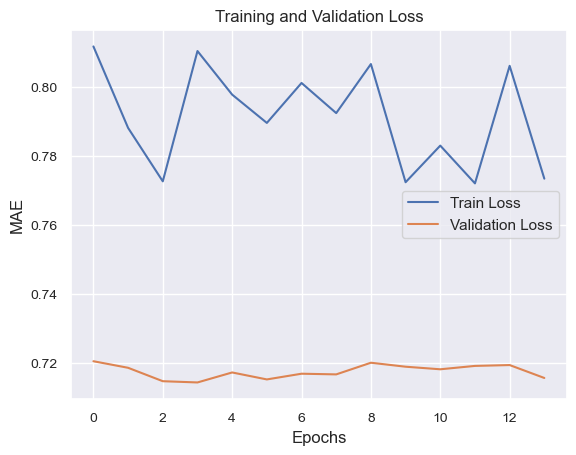

In [30]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
# plt.ylim([0.5, 1])
plt.show()

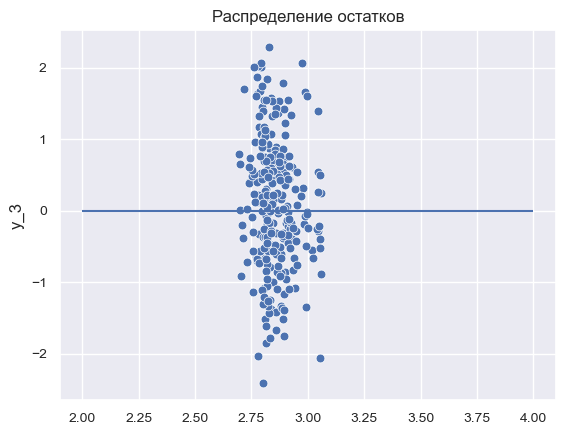

In [31]:
sns.scatterplot(x = y_pred[:, 0], y = y_test - y_pred[:, 0], s = 40)
plt.hlines(y = 0, xmin = 2, xmax = 4)
plt.title('Распределение остатков')
plt.show()

9. Доверительный интервал для предсказаний лучшей модели

In [32]:
y_pred = y_pred[:, 0]

In [33]:
# Вычисляем доверительный интервал для прогноза
n = len(y_test)
p = len(X_test_std[0])
se = np.sqrt(np.sum((y_test - y_pred)**2) / (n - p))

# Задаем уровень доверия
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, n - p)

lower = y_pred - t_value * se
upper = y_pred + t_value * se

y_test = y_test.values
print("Доверительный интервал для прогноза:")
print(f"Нижняя граница:  {lower[:12].round(2)}")
print(f"y_test:          {y_test[:12].round(2)}")
print(f"y_pred:          {y_pred[:12].round(2)}")
print(f"Верхняя граница: {upper[:12].round(2)}")
print()
print(f"Разброс тестовых значений:       {y_test.min().round(2)}; {y_test.max().round(2)}")
print(f"Разброс предсказанных значений:  {y_pred.min().round(2)}; {y_pred.max().round(2)}")
print()
print(f"Наименьшая нижняя граница доверительного интервала:  {lower.min().round(2)}")
print(f"Набольшая верхняя граница доверительного интервала:  {upper.max().round(2)}")

Доверительный интервал для прогноза:
Нижняя граница:  [1.01 1.02 0.99 1.24 1.05 1.13 1.13 1.04 1.11 1.   0.98 0.92]
y_test:          [2.46 2.91 3.28 2.47 3.55 2.73 3.66 2.87 3.55 2.97 1.62 2.71]
y_pred:          [2.78 2.79 2.77 3.02 2.83 2.9  2.9  2.81 2.89 2.77 2.76 2.7 ]
Верхняя граница: [4.56 4.57 4.54 4.8  4.6  4.68 4.68 4.59 4.66 4.55 4.54 4.47]

Разброс тестовых значений:       0.39; 5.12
Разброс предсказанных значений:  2.690000057220459; 3.059999942779541

Наименьшая нижняя граница доверительного интервала:  0.9200000166893005
Набольшая верхняя граница доверительного интервала:  4.829999923706055


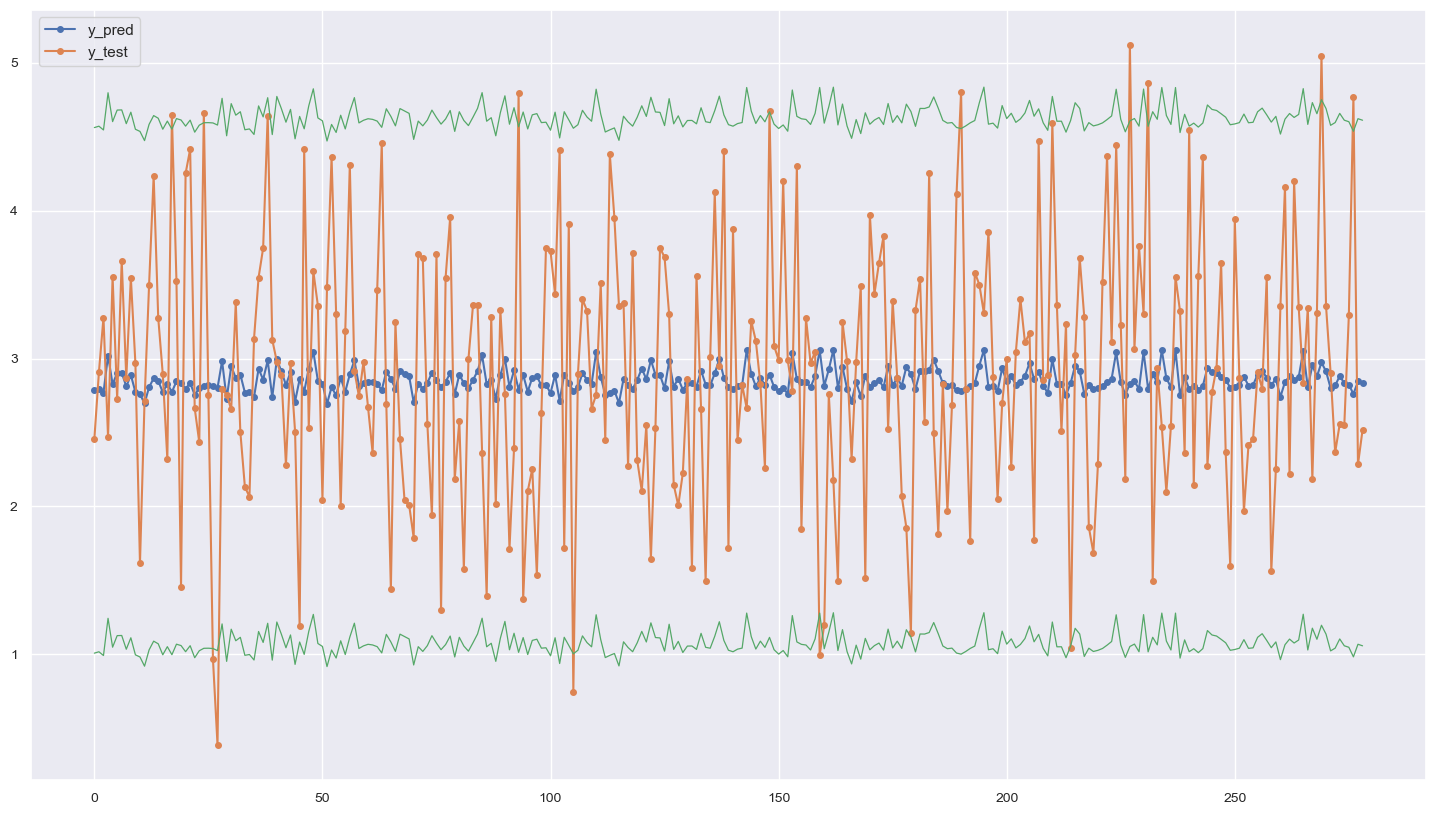

In [34]:
plt.figure(figsize=(18, 10))
plt.plot(y_pred, label='y_pred', marker='o', markersize=4)
plt.plot(y_test, label='y_test', marker='o', markersize=4)
plt.plot(lower, linewidth = 0.9, color='g')
plt.plot(upper, linewidth = 0.9, color='g')
plt.legend()
plt.grid(True)
plt.show()